In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
laptop = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\Clean laptop data.csv", encoding="ISO-8859-1")
laptop.head(10)

,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price
0,LENOVO,WINDOWS,2,6.906891,SSD,2501,4,15.6,141,0.0,YES,235.99
1,ASUS,WINDOWS,2,7.000000,SSD,3048,3,15.6,141,1.0,YES,236.99
2,LENOVO,WINDOWS,2,7.000000,SSD,3685,3,15.6,94,0.0,YES,259.99
3,HP,WINDOWS,2,7.000000,SSD,2689,4,15.6,94,0.0,YES,223.49
4,DELL,WINDOWS,3,7.000000,SSD,3256,3,14.0,157,0.0,YES,374.49
5,ASUS,WINDOWS,4,10.965784,SSD,23322,1,16.0,142,0.0,YES,2396.49
6,LENOVO,WINDOWS,3,7.491853,SSD,3035,4,14.0,105,0.0,YES,151.99
7,LENOVO,WINDOWS,4,7.491853,SSD,6908,3,14.0,157,0.0,YES,428.49
8,LENOVO,WINDOWS,4,7.491853,SSD,2743,4,14.0,118,0.0,YES,296.99
9,ASUS,WINDOWS,4,9.965784,SSD,23697,2,14.0,162,1.0,YES,1410.49


In [14]:
laptop.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM_nth,1001.0,3.367632,0.799194,1.00,3.00,3.00,4.00,6.000000
storage_nth,1001.0,8.423842,1.165340,4.00,8.00,8.00,9.00,10.965784
cpu_benchmark,1001.0,12691.523477,7597.321238,548.00,7607.00,10505.00,17163.00,41175.000000
gpu_class,1001.0,2.724276,0.773240,1.00,2.00,3.00,3.00,4.000000
screen_size,1001.0,14.638561,1.333751,10.10,14.00,14.00,15.60,17.300000
PPI,1001.0,158.789211,34.039426,94.00,141.00,157.00,166.00,338.000000
warranty,1001.0,1.293457,0.919774,0.00,1.00,1.00,1.00,3.250000
price,1001.0,1071.419041,791.968578,95.99,499.99,861.49,1410.49,5987.490000


In [15]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1001 non-null   object 
 1   operating_system  1001 non-null   object 
 2   RAM_nth           1001 non-null   int64  
 3   storage_nth       1001 non-null   float64
 4   storage_type      1001 non-null   object 
 5   cpu_benchmark     1001 non-null   int64  
 6   gpu_class         1001 non-null   int64  
 7   screen_size       1001 non-null   float64
 8   PPI               1001 non-null   int64  
 9   warranty          1001 non-null   float64
 10  refurbished       1001 non-null   object 
 11  price             1001 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 94.0+ KB


In [16]:
laptop['brand'].value_counts()

LENOVO        322
ASUS          145
DELL           97
HP             94
ACER           77
DYNABOOK       62
APPLE          36
OTHER          29
CHILLBLAST     29
MSI            24
AVITA          20
RAZER          19
GEO            18
FUJITSU        15
MEDION         14
Name: brand, dtype: int64

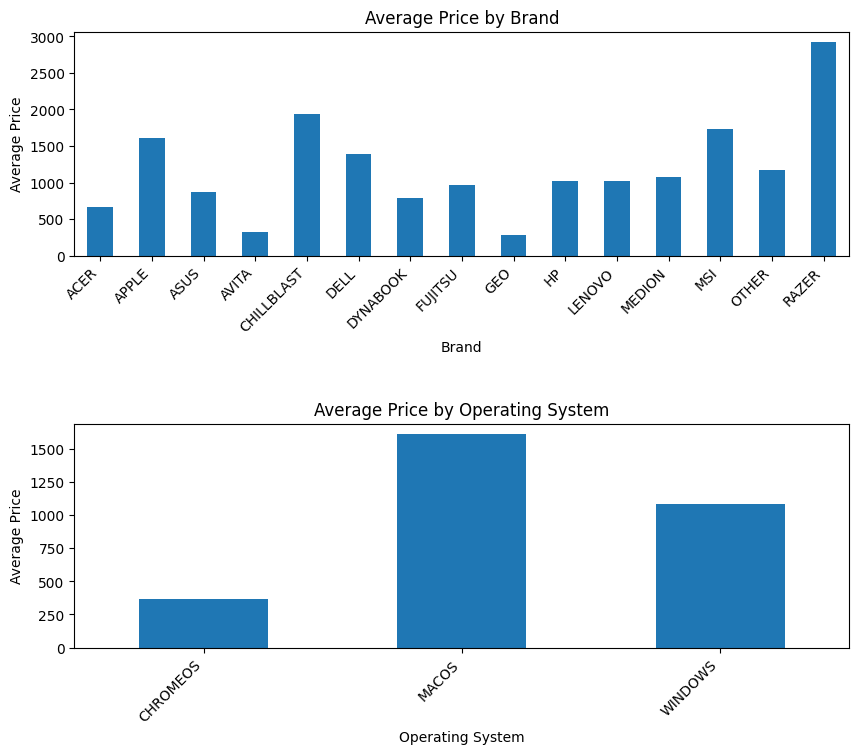

In [18]:
mean_price_brand = laptop.groupby('brand')['price'].mean()
mean_price_system = laptop.groupby('operating_system')['price'].mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'hspace': 0.75})

mean_price_brand.plot(kind='bar', ax=axes[0])

axes[0].set_title('Average Price by Brand')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Average Price')

mean_price_system.plot(kind='bar', ax=axes[1])

axes[1].set_title('Average Price by Operating System')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('Operating System')
axes[1].set_ylabel('Average Price')

plt.show()


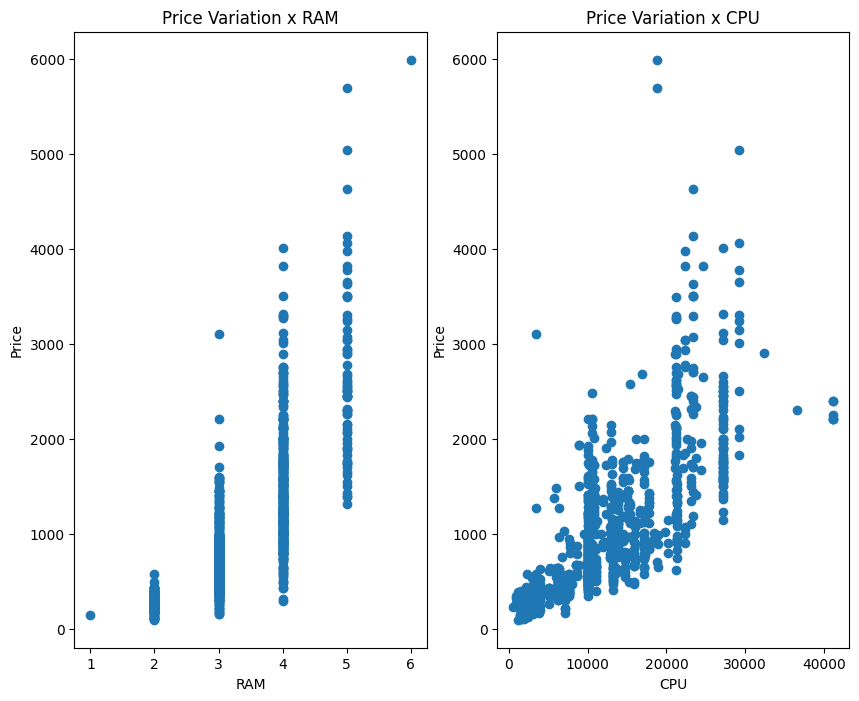

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), gridspec_kw={'hspace': 0.75})

axes[0].scatter(laptop['RAM_nth'],laptop['price'])
axes[0].set_title('Price Variation x RAM')
axes[0].set_xlabel('RAM')
axes[0].set_ylabel('Price')

axes[1].scatter(laptop['cpu_benchmark'],laptop['price'])
axes[1].set_title('Price Variation x CPU')
axes[1].set_xlabel('CPU')
axes[1].set_ylabel('Price')

plt.show()

In [20]:
categorical_vars = ['storage_type','refurbished','brand','operating_system']
numerical_vars = ['RAM_nth','storage_nth', 'cpu_benchmark','gpu_class','screen_size','PPI','warranty']

In [21]:
for var in categorical_vars:
    unique_classes = laptop[var].unique()
    number_of_unique_classes = len(unique_classes)
    print(f'For the categorical variable "{var}", there are {number_of_unique_classes} unique classes.')


For the categorical variable "storage_type", there are 2 unique classes.
For the categorical variable "refurbished", there are 2 unique classes.
For the categorical variable "brand", there are 15 unique classes.
For the categorical variable "operating_system", there are 3 unique classes.


In [22]:
from sklearn.model_selection import train_test_split

X = laptop.drop('price', axis = 1)
y = laptop['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 11), (201, 11))

In [23]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numerical_features

(['brand', 'operating_system', 'storage_type', 'refurbished'],
 ['RAM_nth',
  'storage_nth',
  'cpu_benchmark',
  'gpu_class',
  'screen_size',
  'PPI',
  'warranty'])

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
transformers = [
('cat', OneHotEncoder(drop='first'),categorical_features),
('num',StandardScaler(), numerical_features)
])

In [25]:
from sklearn.pipeline import Pipeline
import lightgbm as lgb

regressor = lgb.LGBMRegressor(random_state = 42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

In [26]:
import warnings

warnings.filterwarnings('ignore')

In [27]:
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 19
[LightGBM] [Info] Start training from score 1063.208516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['brand', 'operating_system',
                                                   'storage_type',
                                                   'refurbished']),
                                                 ('num', StandardScaler(),
                                                  ['RAM_nth', 'storage_nth',
                                                   'cpu_benchmark', 'gpu_class',
                                                   'screen_size', 'PPI',
                                                   'warranty'])])),
                ('regressor', LGBMRegressor(random_state=42))])

In [28]:
from sklearn.metrics import (
mean_absolute_error,
mean_squared_error,
mean_absolute_percentage_error
)


y_pred = pipeline.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae: .2f}")
print(f"MSE: {mse: .2f}")
print(f"MAPE: {mape: .2f}")
print(f"RMSE: {rmse: .2f}")

MAE:  224.13
MSE:  152688.08
MAPE:  0.21
RMSE:  390.75


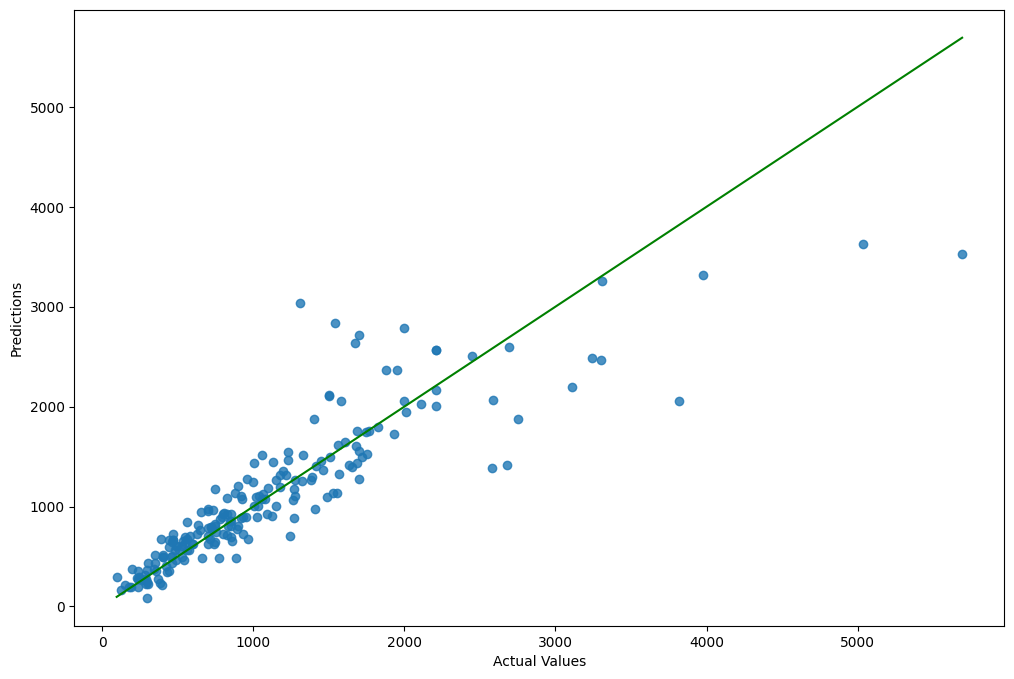

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()